# Ramen Data Visualization

In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#Data Preprocessing
data = pd.read_csv('ramen.csv')
data = pd.DataFrame(data.drop(['Review','Top Ten'],axis=1))
data = data.drop(data.index[30], axis=0)
data.head()

,Brand,Variety,Style,Country,Stars,Unnamed: 7
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


## Helper Functions

In [135]:
def get_dict(country):
    return dict(data['Style'].loc[data['Country'] == country].value_counts())

def get_x(country_dict):
    x = []
    for key,value in country_dict.items():
        x.append(key)
    return x

def get_y(country_dict):
    y = []
    for key,value in country_dict.items():
        y.append(value)
    return y

def get_ratings(style):
    return data['Stars'].loc[data['Style'] == style]

def get_rating_by_country(country):
    return data['Stars'].loc[data['Country'] == country]

def get_style_by_rating(rating):
    if rating == 'good':
        return data['Style'].loc[data['Stars'].astype(float) >= 3.0].value_counts()
    elif rating == 'bad':
        return data['Style'].loc[data['Stars'].astype(float) <= 3.0].value_counts()
    else:
        pass
def get_brand_options_for_style(style):
    return len(data['Brand'].loc[data['Style'] == style].unique())

def get_worst_brands():
    return data['Brand'].loc[data['Stars'].astype(float) <= 3.0].value_counts()

def get_best_brands():
    return data['Brand'].loc[data['Stars'].astype(float) >= 3.0].value_counts()

## Q: Most Consumed Style By All Countries

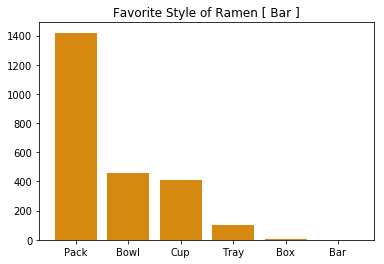

In [85]:
#---------------------------- Bar Graph ----------------------------------
opt = dict(data['Style'].value_counts())
plt.title('Favorite Style of Ramen [ Bar ]')
plt.bar(range(len(opt)), list(opt.values()), align='center', color='#D68910')
plt.xticks(range(len(opt)), list(opt.keys()))
plt.show()

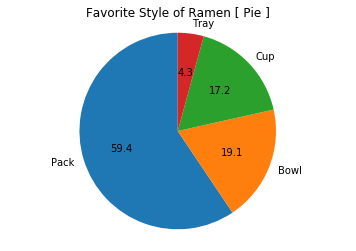

In [86]:
#---------------------------- Pie Chart ------------------------------------
x = []
y = []
for key, value in opt.items():
    x.append(key)
    y.append(value)
plt.title('Favorite Style of Ramen [ Pie ]')
plt.pie(y[:4], labels=x[:4], autopct='%1.1f', startangle=90)
plt.axis('equal')
plt.show()

The pack ramen is the most consumed by far. This can be due to accesibility with bowl coming right after, probably due to bowl coming from resturaunts goers. I will look at each country by country to get a full analysis.

## Q: Distrubution of Stars By All Countries

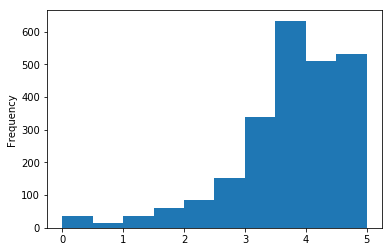

In [87]:
data['Stars'].astype(float).plot.hist()

As you can see the data is skewed to the left, more people give a `3.5` to `5` stars rating than they do for a `0` to `3`. The highest frequency of rating that is given is `3.5` ie. the most common. This can be to people not really hating the ramen but not loving it aswell. 

In [88]:
c_dicts = []
c_names = []
countries = data['Country'].unique()
for i in countries:
    c_dicts.append(get_dict(i))
    c_names.append(i)

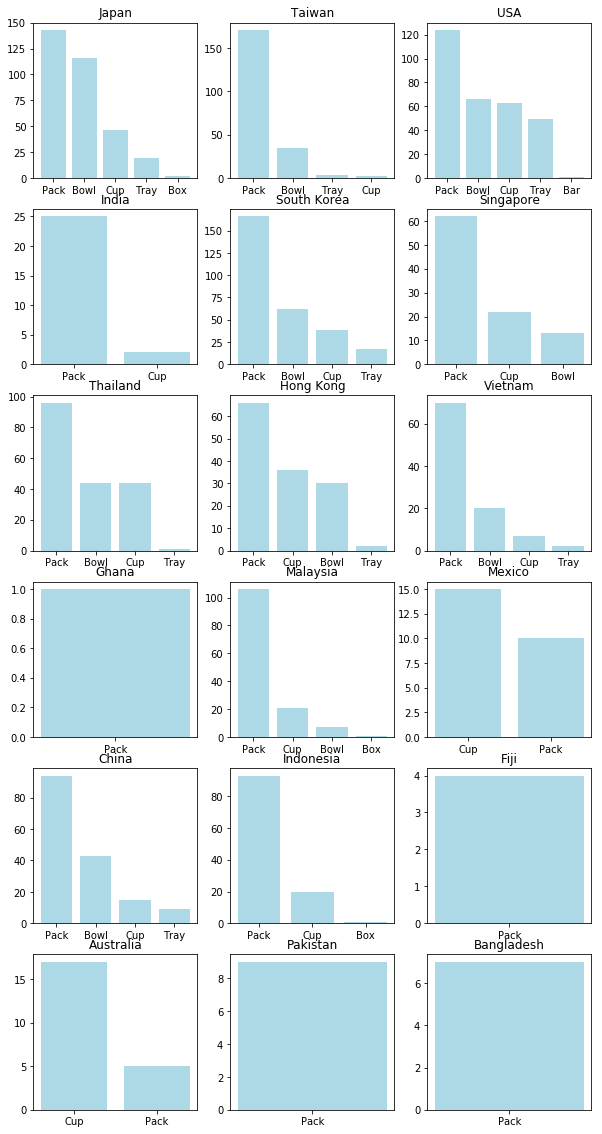

In [89]:
plt.figure(figsize=(10,20), facecolor='white')
plot_number = 1
for i in range(18):
    ax = plt.subplot(6, 3, plot_number)
    ax.bar(get_x(c_dicts[i]), get_y(c_dicts[i]), color='lightblue')
    ax.set_title(c_names[i])
    plot_number = plot_number + 1

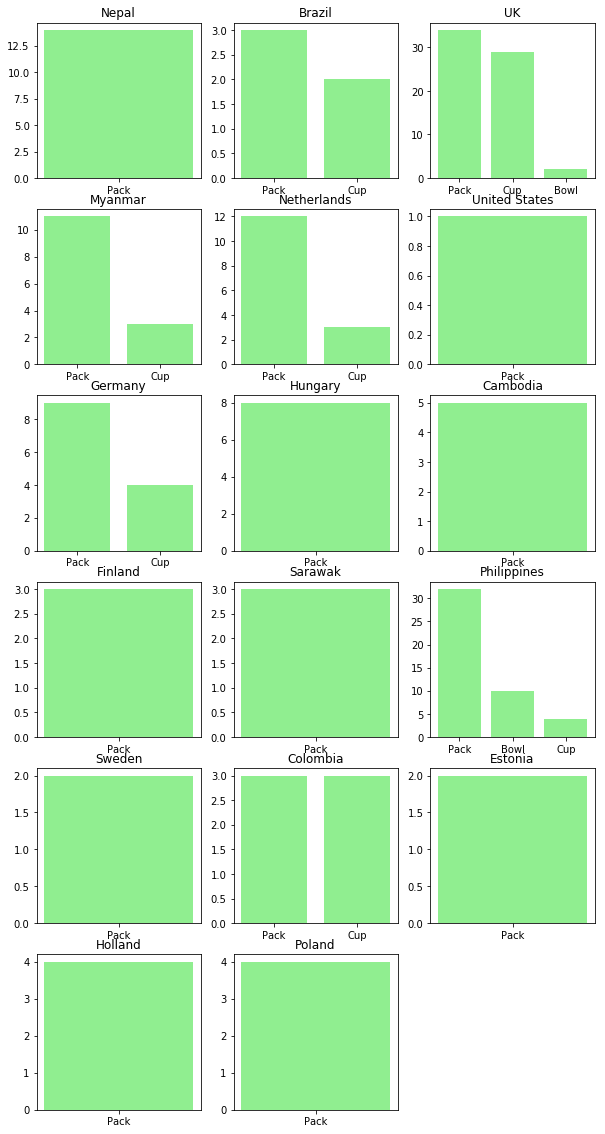

In [90]:
plt.figure(figsize=(10,20), facecolor='white')
plot_number = 1
for i in range(19,36):
    ax = plt.subplot(6, 3, plot_number)
    ax.bar(get_x(c_dicts[i]), get_y(c_dicts[i]), color='lightgreen')
    ax.set_title(c_names[i])
    plot_number = plot_number + 1

Now we have a better overview on all countries choices for style of ramen, in all but one country `(Australia)` pack style of ramen leads. So we know why pack had `59%` of the total style of ramen consumed. Tray comes in dead last and this is due to tray being a choice in primarly asain countries, which are a minority in the dataset.

## Q: Frequecy of Stars Given by Style

In [91]:
pack_freq = get_ratings('Pack').astype(float)
bowl_freq = get_ratings('Bowl').astype(float)
cup_freq = get_ratings('Cup').astype(float)
tray_freq = get_ratings('Tray').astype(float)

### Ratings Distribution for `Pack Style` Ramen

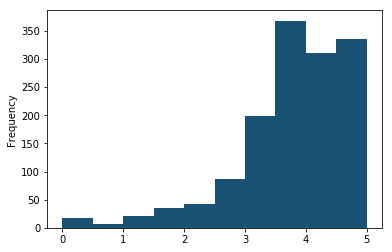

In [92]:
pack_freq.plot(kind='hist',color='#1A5276')

### Ratings Distribution for `Tray Style` Ramen

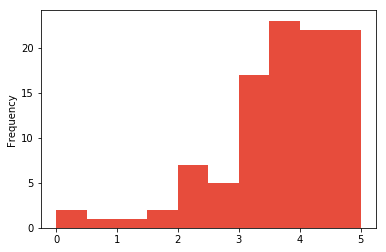

In [93]:
tray_freq.plot(kind='hist', color='#E74C3C')

### Ratings Distribution for `Bowl Style` Ramen

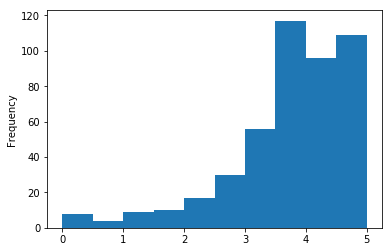

In [94]:
bowl_freq.plot.hist()

### Ratings Distribution for `Cup Style` Ramen

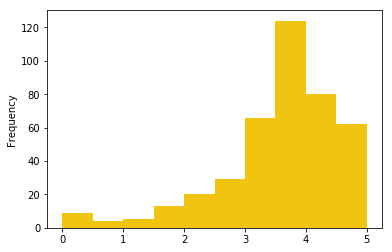

In [95]:
cup_freq.plot(kind="hist", color="#F1C40F")

As you can see most the ratings lean towards `3.5` to `5` stars. And just like the distrubution for all ratings the data is skewed to the left. I think its because the participants of this survey felt that a `3.5` star rating would be adequate, they didnt hate it but did not love it aswell.

In [96]:
country_counts = dict(data['Country'].value_counts())
countries = get_x(country_counts)
counts = get_y(country_counts)

## Q: Number of Participants From Each Country

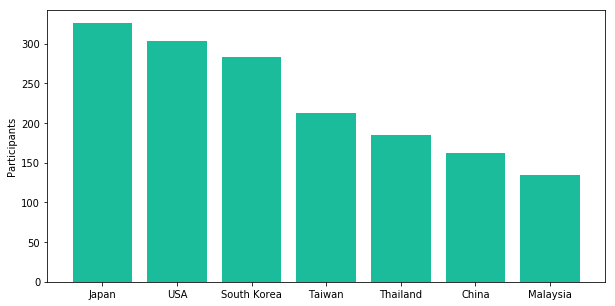

In [97]:
plt.figure(figsize=(10, 5))
plt.bar(countries[:7],counts[:7 ], color='#1ABC9C')
plt.ylabel('Participants')
plt.show()

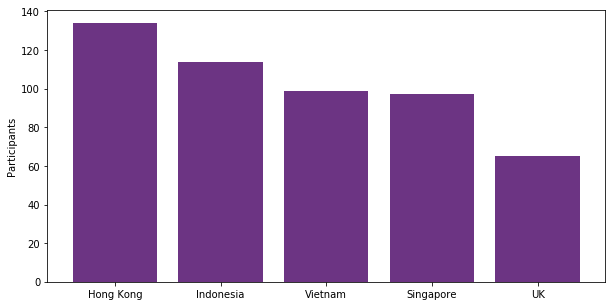

In [98]:
plt.figure(figsize=(10, 5))
plt.bar(countries[7:12],counts[7:12], color='#6C3483')
plt.ylabel('Participants')
plt.show()

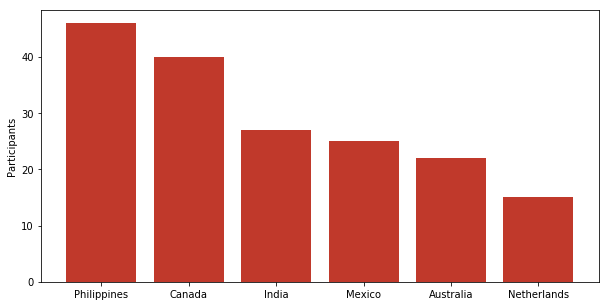

In [99]:
plt.figure(figsize=(10, 5))
plt.bar(countries[12:18],counts[12:18], color='#C0392B')
plt.ylabel('Participants')
plt.show()

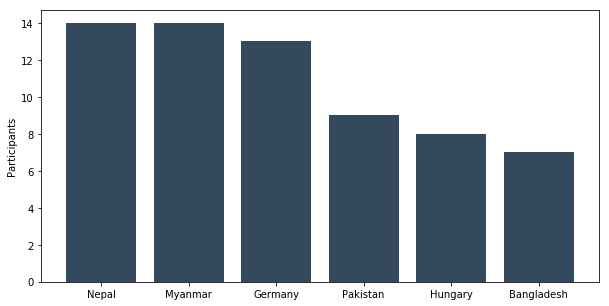

In [107]:
plt.figure(figsize=(10, 5))
plt.bar(countries[18:24],counts[18:24], color='#34495E')
plt.ylabel('Participants')
plt.show()

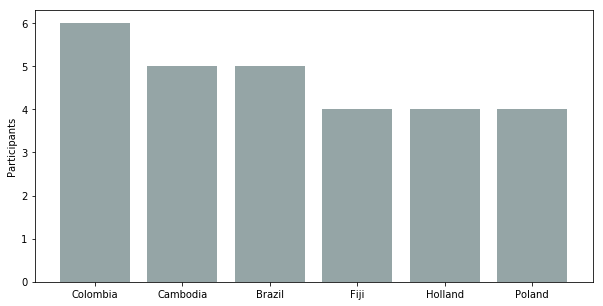

In [101]:
plt.figure(figsize=(10, 5))
plt.bar(countries[24:30],counts[24:30], color='#95A5A6')
plt.ylabel('Participants')
plt.show()

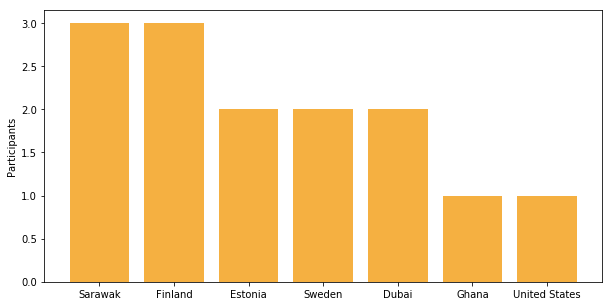

In [102]:
plt.figure(figsize=(10, 5))
plt.bar(countries[30:37],counts[30:37], color='#F5B041')
plt.ylabel('Participants')
plt.show()

The country with the most participants is Japan, which doesnt susprise me because Japan has a big ramen culture. It also isnt concidence that 4 out of the top 5 countries that participated the most are from Asia.

## Which Brand Got The Best Rating

### Apperances on The Naughty List

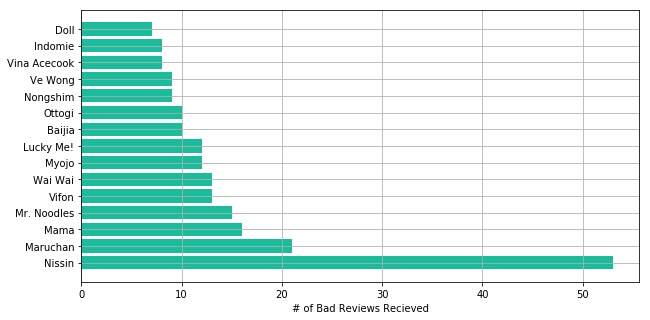

In [103]:
worst_brands = dict(get_worst_brands())
brand_names = list(worst_brands.keys())
brand_apperance_count = list(worst_brands.values())
plt.figure(figsize=(10, 5))
plt.barh(brand_names[:15],brand_apperance_count[:15], color='#1ABC9C')
plt.xlabel('# of Bad Reviews Recieved')
plt.grid(True)
plt.show()

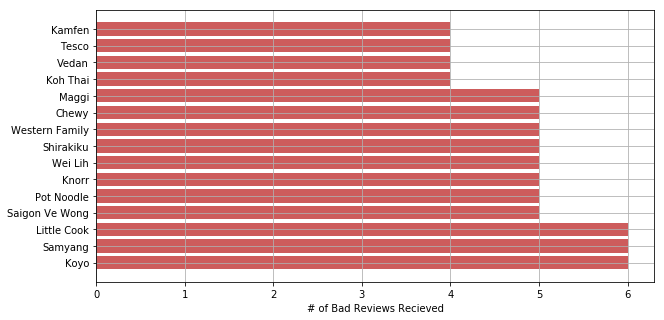

In [104]:
plt.figure(figsize=(10, 5))
plt.barh(brand_names[16:31],brand_apperance_count[16:31], color='#CD5C5C')
plt.xlabel('# of Bad Reviews Recieved')
plt.grid(True)
plt.show()

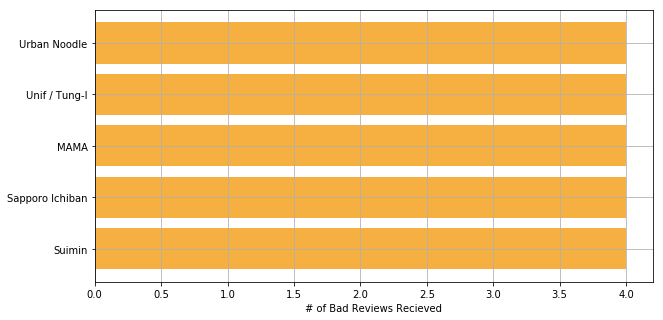

In [105]:
plt.figure(figsize=(10, 5))
plt.barh(brand_names[32:37],brand_apperance_count[32:37], color='#F5B041')
plt.xlabel('# of Bad Reviews Recieved')
plt.grid(True)
plt.show()

The criteria to make in on the `Naughty List` was to recieve a rating of 3.0 and less. 185 companies got such bad reviews. I was susprised to see nissin make the list, I personally enjoy their ramen, but it seems like the consensus is that it's subpar ramen. Who would have guessed

## Q: Good vs Bad Ramen

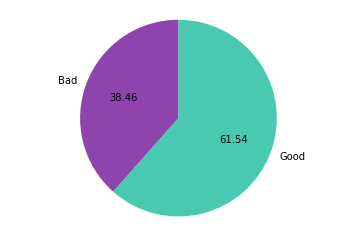

In [106]:
x = [len(get_worst_brands()),len(get_best_brands())]
plt.pie(x, labels=['Bad', 'Good'], autopct='%1.2f', startangle=90, colors=['#8E44AD','#48C9B0'])
plt.axis('equal')
plt.show()

Do not mind the sully colours but its pleasant to know that there are more good than bad tasting brands. But this could have been infered by  looking at the histogram for ratings. If curious there are `185` Bad Reviews and `296` Good Reviews.

## Most Popular Style of Ramen [ Good & Bad Ratings ]

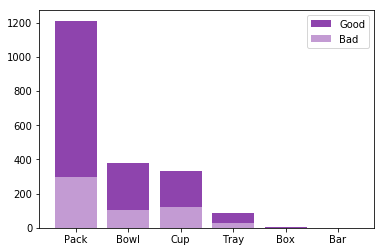

In [131]:
ax = plt.add_subplot(111)
good = ax.bar(get_x(get_style_by_rating('good')),get_y(get_style_by_rating('good')), color="#8E44AD")
bad = ax.bar(get_x(get_style_by_rating('bad')),get_y(get_style_by_rating('bad')),color="#C39BD3")
ax.legend((good, bad), ('Good', 'Bad'))
plt.show()

Like always pack is in the lead. It's also good to note that bowl style ramen does not have too many bad brands associated with it. This is probably due to bowl ramen coming from restaurants more than from markets.

# Highest Variety of Brands Options for Style

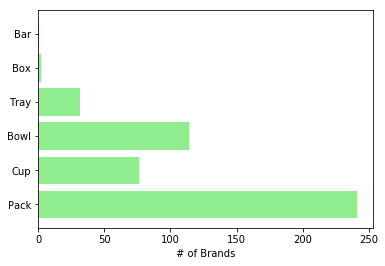

In [155]:
choices = {'Pack' : get_brand_options_for_style('Pack'),
           'Cup' : get_brand_options_for_style('Cup'),
           'Bowl' : get_brand_options_for_style('Bowl'),
           'Tray' : get_brand_options_for_style('Tray'),
           'Box' : get_brand_options_for_style('Box'),
           'Bar' : get_brand_options_for_style('Bar')}
plt.barh(get_x(choices),get_y(choices),color='lightgreen')
plt.xlabel('# of Brands')
plt.show()